# Muestra por lotes

La base de datos "lineal_horm" contiene la cantidad en miligramos de hormona antiinflamatoria que queda en 27 dispositivos después de un cierto número de horas de uso.
En el cual se toman en cuenta 3 lotes diferentes: A, B y C.

In [1]:
#Librerias
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd
from sklearn import linear_model

In [2]:
ruta = "/home/sandra/Videos/Clases- Seminario estadística/Tarea1/"
bd="lineal_horm.xlsx"
bd_horm=pd.read_excel(ruta+bd)

In [3]:
size =9
lotes = [bd_horm.loc[i:i+size-1,:] for i in range(0, len(bd_horm),size)]

### Lotes

#### Lote A

In [4]:
#Lote A
bd_hormA =lotes[0]
bd_hormA

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6
5,A,53,31.1
6,A,184,20.9
7,A,171,20.9
8,A,52,30.4


In [5]:
m_horasA = bd_hormA['horas'].mean()
m_montoA = bd_hormA['monto'].mean()
m_horasA =  np.array(m_horasA)
m_montoA =  np.array(m_montoA)
promedioA = np.array([np.append(m_horasA,m_montoA)])
promedioA

array([[150.55555556,  23.07777778]])

In [6]:
#tomamos una muestra con reemplazo.
bd_random = bd_hormA.sample(n=10,replace=True)
reg = linear_model.LinearRegression()
X = bd_random[["horas"]]
y = bd_random[["monto"]]

In [7]:
d = bd_random[["horas"]]
d.index = list(range(d.shape[0]))
c = pd.DataFrame( {"otro": [1 for i in range(d.shape[0])] } )
mat = pd.concat([c, d], axis=1)
mat = mat.to_numpy()
mat = np.asmatrix(mat)
mat.transpose()

matrix([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
        [293,  52, 293, 196, 155, 171, 184, 152, 152, 184]])

In [8]:
#Ajustamos un modelo de regresión lineal:
reg.fit(X, y)

LinearRegression()

Construcción de $G^{-1}$

In [9]:
G = np.matmul(mat.transpose(), mat)
invG=np.linalg.inv(G)
rootG = sqrt(invG)

/tmp/ipykernel_28444/1479749227.py:3: RuntimeWarning: invalid value encountered in sqrt
  rootG = sqrt(invG)


Devolución de los coeficientes estimados, los cuales deben ajustarse a un modelo de regresión lineal a la muestra de arranque y devolver los coeficientes estimados.

In [10]:
# Devolución de los coeficientes estimados.
b1A=reg.coef_
b0A=reg.intercept_
estimate = np.array([np.append(b0A,b1A)])
EsA = estimate.tolist()

Calculo de residuales

In [11]:
Y_predA = reg.predict(X) 
y_estimA=Y_predA.reshape(-1)
x=X.to_numpy().reshape(-1)
y_realA=y.to_numpy()
y_realA=y_realA.reshape(-1)
y_realA
n=len(y_realA)
residualA=y_realA-y_estimA

Calculo del error estándar de una media muestral.

Error estándar estimado $\hat{se}$

In [12]:
residual_cuaA = residualA ** 2
prom_residualA = mean(residual_cuaA)
sigma_gorro = sqrt(prom_residualA)
se_gorro= sigma_gorro * rootG
se_gorroD=se_gorro.diagonal()
se_lgA = se_gorroD.tolist()

Error estándar estimado $\bar{se}$

In [13]:
np_residualA = sum(residual_cuaA)/(d.shape[0]-2)
sigma_barra = sqrt(np_residualA)
se_barra= sigma_barra * rootG
se_barraD=se_barra.diagonal()
se_lbA = se_barraD.tolist()

Calculo del error estándar de los coeficientes estimados.

In [14]:
df = pd.DataFrame({"Estimate": [EsA[0][0], EsA[0][1]], "$\hat{se}$": [se_lgA[0][0], se_lgA[0][1]], "$se$": [se_lbA[0][0], se_lbA[0][1]]})
df

,Estimate,$\hat{se}$,$se$
0,31.958209,1.068998,1.195176
1,-0.061726,0.005484,0.006131


Entrenaremos 1000 modelos lineales tomando muestras de tamaño 10 de bd_hormA y haremos histogramas de los valores obtenidos.

In [15]:
betas_0A = np.array([])
betas_1A = np.array([])

# Generación de réplicas  bootstrap
for i in range(10000):
    # toma muestra
    bd_random = bd_hormA.sample(n=10,replace=True)
    reg = linear_model.LinearRegression()
    X = bd_random[["horas"]]
    y = bd_random[["monto"]]
   
    # entrena el modelo lineal
    reg.fit(X, y)
    
    # almacena las betas
    b1A=reg.coef_
    b0A=reg.intercept_
    
    betas_0A = np.append(betas_0A, b0A)
    betas_1A = np.append(betas_1A, b1A)

### Histogramas A

La beta_1A estimada sin Bootstrap: -0.06172603060727867
Promedio de beta_1A de la muestras Bootstrap: -0.06872040652326651
( -0.08285273517405478 , -0.05463565182549411 )
La desviación estandar de las beta_1A obtenidas por las muestras Bootstrap es: 0.006783469892332639
Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de: 0.006131092401764239


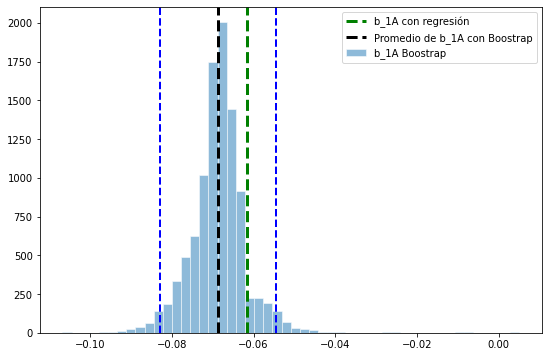

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
hist(betas_1A,bins=50,alpha=0.5,edgecolor="white",label="b_1A Boostrap")
axvline(x=df.iloc[1,0],color='green', linestyle='--',linewidth=3,label="b_1A con regresión")
axvline(x=np.mean(betas_1A),color='black', linestyle='--',linewidth=3,label="Promedio de b_1A con Boostrap")

axvline(percentile(betas_1A,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_1A,97.5),color="blue",linestyle="--",linewidth=2) 
plt.legend(loc='best')

print("La beta_1A estimada sin Bootstrap:", df.iloc[1,0])
print("Promedio de beta_1A de la muestras Bootstrap:", np.mean(betas_1A))
print("(", percentile(betas_1A,2.5),",",percentile(betas_1A,97.5),")")
print("La desviación estandar de las beta_1A obtenidas por las muestras Bootstrap es:", np.std(betas_1A))
print("Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de:", df.iloc[1,2])



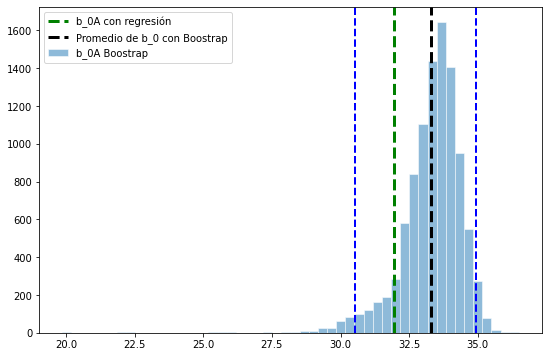

La beta_0 estimada sin Bootstrap: 31.958208807253456
Promedio de beta_0 de la muestras Bootstrap: 33.31716544928699
( 30.51509728250881 , 34.94774295057867 )
La desviación estandar de las beta_0 obtenidas por las muestras Bootstrap es: 1.1191359895235948
Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de: 1.1951762253318632


In [17]:
fig, ax = plt.subplots(figsize=(9,6))
hist(betas_0A,bins=50,alpha=0.5,edgecolor="white",label="b_0A Boostrap")
axvline(x=df.iloc[0,0],color='green', linestyle='--',linewidth=3,label="b_0A con regresión")
axvline(x=np.mean(betas_0A),color='black', linestyle='--',linewidth=3,label="Promedio de b_0 con Boostrap")

axvline(percentile(betas_0A,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_0A,97.5),color="blue",linestyle="--",linewidth=2) 
plt.legend(loc='best')
plt.show()
print("La beta_0 estimada sin Bootstrap:", df.iloc[0,0])
print("Promedio de beta_0 de la muestras Bootstrap:", np.mean(betas_0A))
print("(", percentile(betas_0A,2.5),",",percentile(betas_0A,97.5),")")
print("La desviación estandar de las beta_0 obtenidas por las muestras Bootstrap es:", np.std(betas_0A))
print("Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de:", df.iloc[0,2])



In [18]:
bob0A = mean(betas_0A)
bob0A =  np.array(bob0A)
bob0A

array(33.31716545)

In [19]:
DEA = np.std(betas_0A)
DEA  =  np.array(DEA )
DEA 

array(1.11913599)

### Lote B

In [20]:
#Lote B
bd_hormB =lotes[1]

In [21]:
m_horasB = bd_hormB['horas'].mean()
m_montoB = bd_hormB['monto'].mean()
m_horasB =  np.array(m_horasB)
m_montoB =  np.array(m_montoB)
promedioB = np.array([np.append(m_horasB,m_montoB)])
#tomamos una muestra con reemplazo.
bd_random = bd_hormB.sample(n=10,replace=True)
reg = linear_model.LinearRegression()
X = bd_random[["horas"]]
y = bd_random[["monto"]]
reg.fit(X, y)
d = bd_random[["horas"]]
d.index = list(range(d.shape[0]))
c = pd.DataFrame( {"otro": [1 for i in range(d.shape[0])] } )
mat = pd.concat([c, d], axis=1)
mat = mat.to_numpy()
mat = np.asmatrix(mat)
mat.transpose()
reg.fit(X, y)

## Construcción de $G^{-1}$
G = np.matmul(mat.transpose(), mat)
invG=np.linalg.inv(G)
rootG = sqrt(invG)

/tmp/ipykernel_28444/1849091052.py:24: RuntimeWarning: invalid value encountered in sqrt
  rootG = sqrt(invG)


Obtención de los estimadores ($\beta_0$, $\beta_1$)

In [22]:
b1=reg.coef_
b0=reg.intercept_
estimate = np.array([np.append(b0,b1)])
EsB = estimate.tolist()
EsB

[[36.159145814097556, -0.0588423756150583]]

In [23]:
Y_pred = reg.predict(X) 
y_estim=Y_pred.reshape(-1)
x=X.to_numpy().reshape(-1)
y_real=y.to_numpy()
y_real=y_real.reshape(-1)
y_real
n=len(y_real)
residual=y_real-y_estim
## Error estandar estimado 1
residual_cua = residual ** 2
prom_residual = mean(residual_cua)
sigma_gorro = sqrt(prom_residual)
se_gorro= sigma_gorro * rootG
se_gorroD=se_gorro.diagonal()
se_lgB = se_gorroD.tolist()

## Error estandar estimado 1
np_residual = sum(residual_cua)/(d.shape[0]-2)
sigma_barra = sqrt(np_residual)
se_barra= sigma_barra * rootG
se_barraD=se_barra.diagonal()
se_lbB = se_barraD.tolist()

In [24]:
df = pd.DataFrame({"Estimate": [EsB[0][0], EsB[0][1]], "$\hat{se}$": [se_lgB[0][0], se_lgB[0][1]], "$se$": [se_lbB[0][0], se_lbB[0][1]]})
df

,Estimate,$\hat{se}$,$se$
0,36.159146,1.174392,1.313011
1,-0.058842,0.004031,0.004507


Bootstrap
una vez que ya sabemos cuales son los erroes estandar de las  𝛽  podemos comparar el resultado usando Bootstrap.

Entrenaremos 1000 modelos lineales tomando muestras de tamaño 10 de bd_horm y haremos histogramas de los valores obtenidos.

In [25]:
betas_0B = np.array([])
betas_1B = np.array([])

for i in range(10000):
    # toma muestra
    bd_random = bd_hormB.sample(n=10,replace=True)
    reg = linear_model.LinearRegression()
    X = bd_random[["horas"]]
    y = bd_random[["monto"]]
   
    # entrena el modelo lineal
    reg.fit(X, y)
    
    # almacena las betas
    b1B=reg.coef_
    b0B=reg.intercept_
    
    betas_0B = np.append(betas_0B, b0B)
    betas_1B = np.append(betas_1B, b1B)

### Histogramas B

La beta_1 estimada sin Bootstrap: -0.0588423756150583
Promedio de beta_1 de la muestras Bootstrap: -0.05643203170183748
( -0.06527271221023544 , -0.047538170936290966 )
La desviación estandar de las beta_1 obtenidas por las muestras Bootstrap es: 0.004398427841888987
Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de: 0.004506984102795363


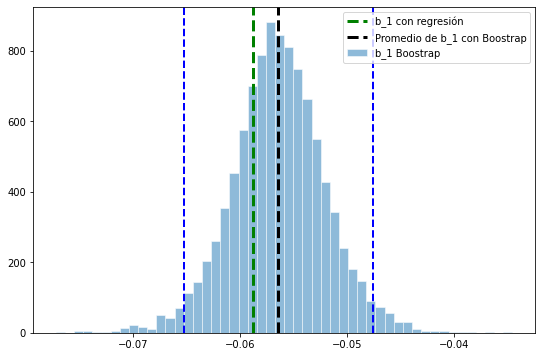

In [26]:
fig, ax = plt.subplots(figsize=(9,6))
hist(betas_1B,bins=50,alpha=0.5,edgecolor="white",label="b_1 Boostrap")
axvline(x=df.iloc[1,0],color='green', linestyle='--',linewidth=3,label="b_1 con regresión")
axvline(x=np.mean(betas_1B),color='black', linestyle='--',linewidth=3,label="Promedio de b_1 con Boostrap")

axvline(percentile(betas_1B,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_1B,97.5),color="blue",linestyle="--",linewidth=2) 
plt.legend(loc='best')

print("La beta_1 estimada sin Bootstrap:", df.iloc[1,0])
print("Promedio de beta_1 de la muestras Bootstrap:", np.mean(betas_1B))
print("(", percentile(betas_1B,2.5),",",percentile(betas_1B,97.5),")")
print("La desviación estandar de las beta_1 obtenidas por las muestras Bootstrap es:", np.std(betas_1B))
print("Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de:", df.iloc[1,2])


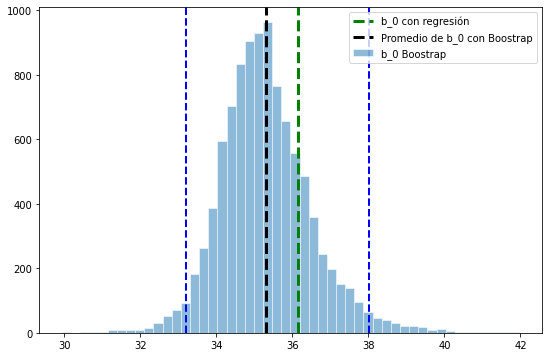

La beta_0 estimada sin Bootstrap: 36.159145814097556
Promedio de beta_0 de la muestras Bootstrap: 35.294953382581156
( 33.18750583474171 , 38.026611842411796 )
La desviación estandar de las beta_0 obtenidas por las muestras Bootstrap es: 1.1975333239921293
Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de: 1.3130106369760663


In [27]:

fig, ax = plt.subplots(figsize=(9,6))
hist(betas_0B,bins=50,alpha=0.5,edgecolor="white",label="b_0 Boostrap")
axvline(x=df.iloc[0,0],color='green', linestyle='--',linewidth=3,label="b_0 con regresión")
axvline(x=np.mean(betas_0B),color='black', linestyle='--',linewidth=3,label="Promedio de b_0 con Boostrap")

axvline(percentile(betas_0B,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_0B,97.5),color="blue",linestyle="--",linewidth=2) 
plt.legend(loc='best')
plt.show()
print("La beta_0 estimada sin Bootstrap:", df.iloc[0,0])
print("Promedio de beta_0 de la muestras Bootstrap:", np.mean(betas_0B))
print("(", percentile(betas_0B,2.5),",",percentile(betas_0B,97.5),")")
print("La desviación estandar de las beta_0 obtenidas por las muestras Bootstrap es:", np.std(betas_0B))
print("Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de:", df.iloc[0,2])



In [28]:
bob0B = mean(betas_0B)
bob0B =  np.array(bob0B)
DEB = np.std(betas_0B)
DEB  =  np.array(DEB )

### Lote C

In [29]:
bd_hormC =lotes[2]
bd_hormC

,lote,horas,monto
18,C,119,28.8
19,C,188,22.0
20,C,115,29.7
21,C,88,28.9
22,C,58,32.8
23,C,49,32.5
24,C,150,25.4
25,C,107,31.7
26,C,125,28.5


In [30]:
m_horasC = bd_hormC['horas'].mean()
m_montoC = bd_hormC['monto'].mean()
m_horasC =  np.array(m_horasC)
m_montoC =  np.array(m_montoC)
promedioC = np.array([np.append(m_horasC,m_montoC)])
#tomamos una muestra con reemplazo.
bd_random = bd_hormC.sample(n=10,replace=True)
reg = linear_model.LinearRegression()
X = bd_random[["horas"]]
y = bd_random[["monto"]]
reg.fit(X, y)
d = bd_random[["horas"]]
d.index = list(range(d.shape[0]))
c = pd.DataFrame( {"otro": [1 for i in range(d.shape[0])] } )
mat = pd.concat([c, d], axis=1)
mat = mat.to_numpy()
mat = np.asmatrix(mat)
mat.transpose()

matrix([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
        [ 58,  58,  58, 115, 115, 125,  58, 107,  58, 188]])

In [31]:
reg.fit(X, y)

LinearRegression()

In [32]:
G = np.matmul(mat.transpose(), mat)
invG=np.linalg.inv(G)
rootG = sqrt(invG)

/tmp/ipykernel_28444/1479749227.py:3: RuntimeWarning: invalid value encountered in sqrt
  rootG = sqrt(invG)


In [33]:
b1=reg.coef_
b0=reg.intercept_
estimate = np.array([np.append(b0,b1)])
EsC = estimate.tolist()

Y_pred = reg.predict(X) 
y_estim=Y_pred.reshape(-1)
x=X.to_numpy().reshape(-1)
y_real=y.to_numpy()
y_real=y_real.reshape(-1)
y_real
n=len(y_real)
residual=y_real-y_estim

np_residual = sum(residual_cua)/(d.shape[0]-2)
sigma_barra = sqrt(np_residual)
se_barra= sigma_barra * rootG
se_barraD=se_barra.diagonal()
se_lbC = se_barraD.tolist()

residual_cua = residual ** 2
prom_residual = mean(residual_cua)
sigma_gorro = sqrt(prom_residual)
se_gorro= sigma_gorro * rootG
se_gorroD=se_gorro.diagonal()
se_lgC = se_gorroD.tolist()

In [34]:
df = pd.DataFrame({"Estimate": [EsC[0][0], EsC[0][1]], "$\hat{se}$": [se_lgC[0][0], se_lgC[0][1]], "$se$": [se_lbC[0][0], se_lbC[0][1]]})
df

,Estimate,$\hat{se}$,$se$
0,37.574197,0.736834,1.302335
1,-0.074619,0.007167,0.012668


In [35]:
betas_0C = np.array([])
betas_1C = np.array([])

for i in range(10000):
    # toma muestra
    bd_random = bd_hormC.sample(n=10,replace=True)
    reg = linear_model.LinearRegression()
    X = bd_random[["horas"]]
    y = bd_random[["monto"]]
   
    # entrena el modelo lineal
    reg.fit(X, y)
    
    # almacena las betas
    b1C=reg.coef_
    b0C=reg.intercept_
    
    betas_0C = np.append(betas_0C, b0C)
    betas_1C = np.append(betas_1C, b1C)

### Histogramas C

La beta_1 estimada sin Bootstrap: -0.07461911357340718
Promedio de beta_1 de la muestras Bootstrap: -0.07304353334379571
( -0.09719639435020226 , -0.04401852083193532 )
La desviación estandar de las beta_1 obtenidas por las muestras Bootstrap es: 0.013067461643639778
Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de: 0.012668048685995907


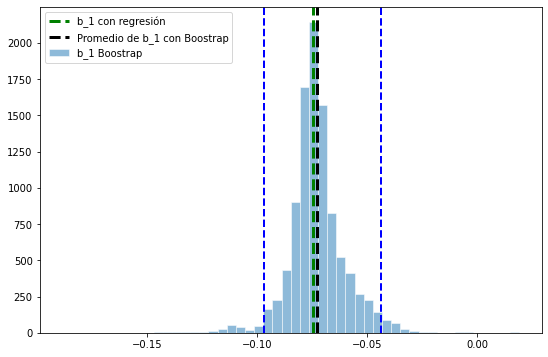

In [36]:
fig, ax = plt.subplots(figsize=(9,6))
hist(betas_1C,bins=50,alpha=0.5,edgecolor="white",label="b_1 Boostrap")
axvline(x=df.iloc[1,0],color='green', linestyle='--',linewidth=3,label="b_1 con regresión")
axvline(x=np.mean(betas_1C),color='black', linestyle='--',linewidth=3,label="Promedio de b_1 con Boostrap")

axvline(percentile(betas_1C,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_1C,97.5),color="blue",linestyle="--",linewidth=2) 
plt.legend(loc='best')

print("La beta_1 estimada sin Bootstrap:", df.iloc[1,0])
print("Promedio de beta_1 de la muestras Bootstrap:", np.mean(betas_1C))
print("(", percentile(betas_1C,2.5),",",percentile(betas_1C,97.5),")")
print("La desviación estandar de las beta_1 obtenidas por las muestras Bootstrap es:", np.std(betas_1C))
print("Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de:", df.iloc[1,2])
        


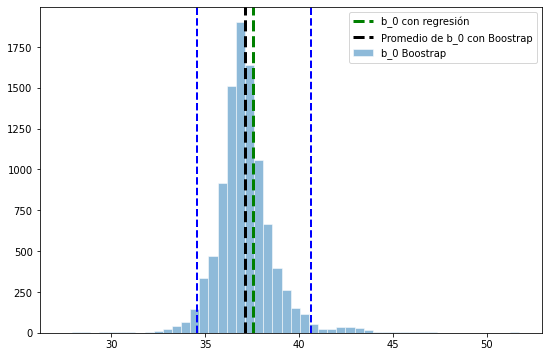

La beta_0 estimada sin Bootstrap: 37.574196675900275
Promedio de beta_0 de la muestras Bootstrap: 37.144569024517125
( 34.59270643063769 , 40.62318047726562 )
La desviación estandar de las beta_0 obtenidas por las muestras Bootstrap es: 1.5479905018148203
Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de: 1.3023345539989901


In [37]:
fig, ax = plt.subplots(figsize=(9,6))
hist(betas_0C,bins=50,alpha=0.5,edgecolor="white",label="b_0 Boostrap")
axvline(x=df.iloc[0,0],color='green', linestyle='--',linewidth=3,label="b_0 con regresión")
axvline(x=np.mean(betas_0C),color='black', linestyle='--',linewidth=3,label="Promedio de b_0 con Boostrap")

axvline(percentile(betas_0C,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_0C,97.5),color="blue",linestyle="--",linewidth=2) 
plt.legend(loc='best')
plt.show()
print("La beta_0 estimada sin Bootstrap:", df.iloc[0,0])
print("Promedio de beta_0 de la muestras Bootstrap:", np.mean(betas_0C))
print("(", percentile(betas_0C,2.5),",",percentile(betas_0C,97.5),")")
print("La desviación estandar de las beta_0 obtenidas por las muestras Bootstrap es:", np.std(betas_0C))
print("Que resulta ser una buena aproximación al error estandar insesgado obtenido arriba de:", df.iloc[0,2])



In [39]:
bob0C = mean(betas_0C)
bob0C =  np.array(bob0C)
bob0C

array(37.14456902)

In [40]:
DEC = np.std(betas_0C)
DEC  =np.array(DEC)
DEC 

array(1.5479905)

### Análisis por Lotes

In [41]:
df_m = pd.DataFrame({"Horas": [promedioA[0][0], promedioB[0][0], promedioC[0][0]], "$Monto$": [promedioA[0][1], promedioB[0][1], promedioC[0][1]]})
df_m

,Horas,$Monto$
0,150.555556,23.077778
1,233.444444,22.066667
2,111.000000,28.922222


Resultados del modelo de ajuste a los datos hormonales.

In [42]:
df = pd.DataFrame({"Estimate": [EsA[0][0], EsB[0][0], EsC[0][0]], "$\hat{se}$": [se_lgA[0][0], se_lgB[0][0], se_lgC[0][0]], "$se$": [se_lbA[0][0], se_lbB[0][0], se_lbC[0][0]]})
df

,Estimate,$\hat{se}$,$se$
0,31.958209,1.068998,1.195176
1,36.159146,1.174392,1.313011
2,37.574197,0.736834,1.302335


In [43]:
bob0A = np.array([bob0A])
bob0B = np.array([bob0B])
bob0C = np.array([bob0C])

In [44]:
B = np.append (bob0A, bob0B)
B = np.append(B,bob0C)


In [45]:
DEA = np.array([DEA])
DEB = np.array([DEB])
DEC = np.array([DEC])
 

In [46]:
S = np.append (DEA, DEB)
S = np.append(S,DEC)

In [47]:
df = pd.DataFrame({"Estimate": [EsA[0][0], EsB[0][0], EsC[0][0]],  "$Boot$": [B[0], B[1], B[2]]})
df

,Estimate,$Boot$
0,31.958209,33.317165
1,36.159146,35.294953
2,37.574197,37.144569


In [48]:
df = pd.DataFrame({"Estimate": [EsA[0][0], EsB[0][0], EsC[0][0]], "$\hat{se}$": [se_lgA[0][0], se_lgB[0][0], se_lgC[0][0]], "$se$": [se_lbA[0][0], se_lbB[0][0], se_lbC[0][0]], "$Boot$": [B[0], B[1], B[2]], "$Ds$": [S[0], S[1], S[2]]})
df

,Estimate,$\hat{se}$,$se$,$Boot$,$Ds$
0,31.958209,1.068998,1.195176,33.317165,1.119136
1,36.159146,1.174392,1.313011,35.294953,1.197533
2,37.574197,0.736834,1.302335,37.144569,1.547991


Podemos notar que  desviación estandar de las $\beta_0$ obtenidas por las muestras Bootstrap, en los tres lotes 
son una buena aproximación al error estandar insesgado.
Sin embargo aparatir de los coeficientes estimados y el error estandar podemos notar que los datos del lote A se encuentran más alejados de los datos B, C. Mientras qeu C se encuntra más cercano a los datos de B. Esto lo pudimos apreciar al efectuar la diferencia de  (Estimate - se ) de la tabla anterior.

### Histograma del comportamiento de los coeficientes estimados.

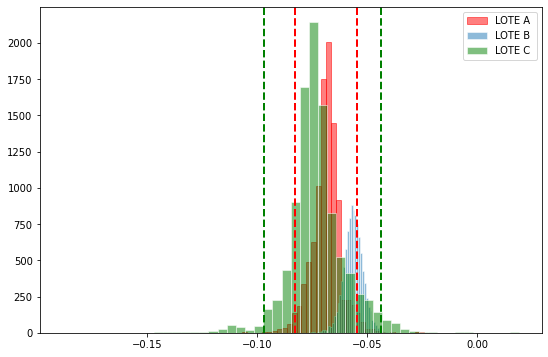

In [49]:
fig, ax = plt.subplots(figsize=(9,6))
plt.hist(betas_1A,bins=50,alpha=0.5,edgecolor="red", color = "red",label="LOTE A ")
axvline(percentile(betas_1A,2.5),color="red",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_1A,97.5),color="red",linestyle="--",linewidth=2) 

plt.hist(betas_1B,bins=50,alpha=0.5,edgecolor="white",label="LOTE B") 
plt.hist(betas_1C,bins=50,alpha=0.5,edgecolor="white",color="green",label="LOTE C")
axvline(percentile(betas_1C,2.5),color="green",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_1C,97.5),color="green",linestyle="--",linewidth=2) 
plt.legend(loc='best')


plt.show()

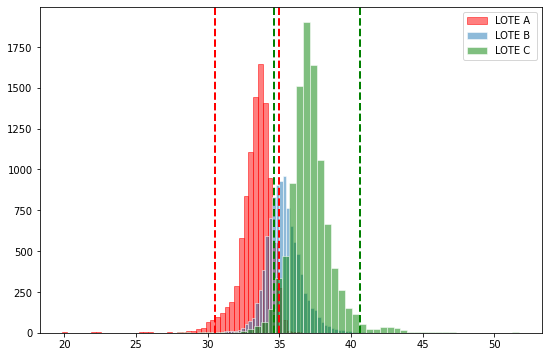

In [50]:
fig, ax = plt.subplots(figsize=(9,6))
plt.hist(betas_0A,bins=50,alpha=0.5,edgecolor="red", color = "red",label="LOTE A ")
axvline(percentile(betas_0A,2.5),color="red",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_0A,97.5),color="red",linestyle="--",linewidth=2) 

plt.hist(betas_0B,bins=50,alpha=0.5,edgecolor="white",label="LOTE B") 
plt.hist(betas_0C,bins=50,alpha=0.5,edgecolor="white",color="green",label="LOTE C")
axvline(percentile(betas_0C,2.5),color="green",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(betas_0C,97.5),color="green",linestyle="--",linewidth=2) 
plt.legend(loc='best')


plt.show()


La coparación de los histogramas de los coeficientes B_0 nos muestra que la mayoría de los datos de A se encuentran alejados de la línea de regresión propuesta. Sin embargo  tanto los datos de los lores By C se encuentar ajustados al modelo propuesto.
Esto sugiere la falta de precisión del modelo, ya que si este lo fuera, lo que se esperaría ver es que  aproximadamente la mitad de los datos de cada lote debe quedar por encima y la mitad por debajo de la línea ajustada. 